### This Lab is open from 10/6 at 6 am to 10/9 at 11:59 pm

The data set called Highway1 (used by  by Carl Hoffstedt in his paper: https://rdrr.io/rforge/alr4/man/Highway1.html) relate the automobile accident rate, in accidents per million vehicle miles to several potential terms. The data include 39 sections of large Highways in the state of Minnesota in 1973. The goal of this analysis is to see how the rate variable are affetcted by some of the variables that are highly correlated with the rate and finding out which ones affect the rate variable the most. 

Read the details of the data by clicking the link.

In [1]:
# Packages
import pandas as pd
import numpy as np
#The following package is for linear regression. We will be using Ordinary Least Square (OLS).
import statsmodels.api as sm
# For plotting
import matplotlib as mpt
import matplotlib.pyplot as plt
import seaborn as sns

Read more about statmmodel here.
https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

### Problem 1  [10]
Upload the Highway data in Jupyter notebook. This data came from the R package, which uses index starting at 1, unlike in python, where indices begin at 0. When you upload highway1 data to the jupyter notebook, you will see an unnecessary column that says column 0. Remove it and find the correlation matrix of the remaining columns. In this data, the "rate" is the dependent variable. Find and report two variables with the highest positive correlation and the highest negative correlation with the variable "rate." Call these two variables $x$ and $z$, respectively. Make sure to avoid correlation with itself.

In [2]:
hwy = pd.read_csv('highway1.csv')
hwy = hwy.drop(columns=['Unnamed: 0'])
hwy.corr()

,rate,len,ADT,trks,sigs1,slim,shld,lane,acpt,itg,lwid
rate,1.000000,-0.465290,-0.028570,-0.512522,0.603191,-0.680984,-0.386907,-0.032979,0.752025,-0.024841,-0.005619
len,-0.465290,1.000000,-0.271569,0.495943,-0.391851,0.186243,-0.104926,-0.202504,-0.238706,-0.247562,-0.310650
ADT,-0.028570,-0.271569,1.000000,-0.096682,0.159381,0.244157,0.457307,0.823930,-0.223980,0.903701,0.127878
trks,-0.512522,0.495943,-0.096682,1.000000,-0.475308,0.296184,0.006135,-0.153324,-0.360266,-0.067231,-0.155271
sigs1,0.603191,-0.391851,0.159381,-0.475308,1.000000,-0.424415,-0.124103,0.263967,0.513461,0.087017,0.062084
slim,-0.680984,0.186243,0.244157,0.296184,-0.424415,1.000000,0.689009,0.264520,-0.681521,0.241282,0.098693
shld,-0.386907,-0.104926,0.457307,0.006135,-0.124103,0.689009,1.000000,0.481771,-0.424951,0.375022,-0.042896
lane,-0.032979,-0.202504,0.823930,-0.153324,0.263967,0.264520,0.481771,1.000000,-0.208779,0.697913,0.095723
acpt,0.752025,-0.238706,-0.223980,-0.360266,0.513461,-0.681521,-0.424951,-0.208779,1.000000,-0.200158,-0.042013
itg,-0.024841,-0.247562,0.903701,-0.067231,0.087017,0.241282,0.375022,0.697913,-0.200158,1.000000,0.102883


In [3]:
x = hwy["acpt"]
z = hwy["slim"]
y = hwy["rate"]

Highest positive correlation: acpt
Highest negative correlation: slim

### Problem 2 [10]
Let $y$ be to the column 'rate' and $x$ to be the column you got in problem 1. Make sure to add a constant to x. Fit a linear regression model and find the coefficients $\beta_0$ and $\beta_1$ in the linear regression equation $y\approx \beta_0 +\beta_1 x$. Print the summary of the model report $R^2$ value. Read more about $R^2$ value here.
https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit
 Among many details that come out of the linear model summary, we will only focus on $R^2$, the coef, and intercept for now.

In [4]:
X = sm.add_constant(x)
lr = (sm.OLS(y, x))
lr.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   rate   R-squared (uncentered):                   0.839
Model:                            OLS   Adj. R-squared (uncentered):              0.835
Method:                 Least Squares   F-statistic:                              198.5
Date:                Thu, 08 Oct 2020   Prob (F-statistic):                    1.14e-16
Time:                        22:34:07   Log-Likelihood:                         -77.421
No. Observations:                  39   AIC:                                      156.8
Df Residuals:                      38   BIC:                                      158.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
acpt           0.2641      0.019     14.090      0.000       0.226       0.302
==============================================================================
Omnibus:                        9.666   Durbin-Watson:                   1.668
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               10.728
Skew:                          -0.757   Prob(JB):                      0.00468
Kurtosis:                       5.076   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 0.1603x + 1.9845  
$\beta_0$ = 1.98845  
$\beta_1$ = 0.1603 
$R^2$ = 0.566

### Problem 3 [10]
Repreat Problem 2 with the variable y and z.

In [5]:
Z = sm.add_constant(z)
lr = (sm.OLS(y, z))
lr.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   rate   R-squared (uncentered):                   0.737
Model:                            OLS   Adj. R-squared (uncentered):              0.730
Method:                 Least Squares   F-statistic:                              106.4
Date:                Thu, 08 Oct 2020   Prob (F-statistic):                    1.43e-12
Time:                        22:34:07   Log-Likelihood:                         -87.043
No. Observations:                  39   AIC:                                      176.1
Df Residuals:                      38   BIC:                                      177.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
slim           0.0682      0.007     10.315      0.000       0.055       0.082
==============================================================================
Omnibus:                        9.261   Durbin-Watson:                   1.574
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                8.477
Skew:                           1.104   Prob(JB):                       0.0144
Kurtosis:                       3.586   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = -0.2312x + 16.651  
$\beta_0$ = 16.651  
$\beta_1$ = -0.2312  
$R^2$ = 0.464

### Problem 4 [10]
a) Make a scatter plot of the data you used in problem 2 together with the fitted line. Label the plot apprpriately. b) Do the same for the data and models in problem 3. 

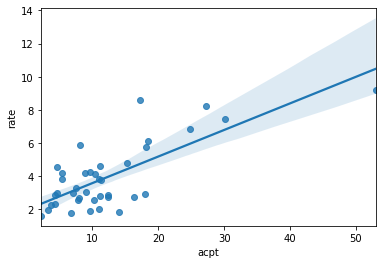

In [4]:
sns.regplot(x='acpt', y='rate', data=hwy)

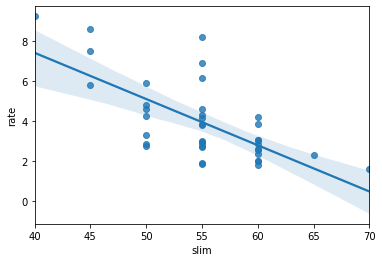

In [7]:
sns.regplot(x='slim', y='rate', data=hwy)

### Problem 5   [10]
a) Fit a quadratic model $y = a+ bx + cx^2$ and report the values of $a,b$ and $c$ and the summary of the model. Compare and comment on the values of $R^2$ of this model and the model from 2. 

b) Repeat 5(a) for $y$ and $z$. Compare and comment on the values of $R^2$ of this model and the model from problem 3. 

In [8]:
from sklearn.preprocessing import PolynomialFeatures
x2 = np.array(x).reshape(-1,1)
y2 = np.array(y).reshape(-1,1)
polyfeats = PolynomialFeatures(degree=2)
xq = polyfeats.fit_transform(x2)
quad = sm.OLS(y, xq).fit()
quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rate   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     24.29
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           2.11e-07
Time:                        22:34:08   Log-Likelihood:                -64.937
No. Observations:                  39   AIC:                             135.9
Df Residuals:                      36   BIC:                             140.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6010      0.568      2.817      0.008       0.448       2.754
x1             0.2134      0.066      3.240      0.003       0.080       0.347
x2            -0.0011      0.001     -0.862      0.395      -0.004       0.002
==============================================================================
Omnibus:                        2.466   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.291   Jarque-Bera (JB):                1.424
Skew:                           0.407   Prob(JB):                        0.491
Kurtosis:                       3.463   Cond. No.                     1.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$R^2$ for the quadratic model is significantly smaller at 0.574 than $R^2$ for the linear model, which has an $R^2$ of 0.839. This indicates that the linear model was actually a better fit than the quadratic model

In [9]:
z2 = np.array(z).reshape(-1,1)
zq = polyfeats.fit_transform(z2)
quad = sm.OLS(y, zq).fit()
quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rate   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     18.70
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           2.70e-06
Time:                        22:34:08   Log-Likelihood:                -67.700
No. Observations:                  39   AIC:                             141.4
Df Residuals:                      36   BIC:                             146.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.0585     12.953      3.093      0.004      13.789      66.328
x1            -1.1013      0.476     -2.313      0.027      -2.067      -0.136
x2             0.0080      0.004      1.834      0.075      -0.001       0.017
==============================================================================
Omnibus:                       12.678   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.376
Skew:                           1.108   Prob(JB):                      0.00125
Kurtosis:                       4.823   Cond. No.                     1.77e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$R^2$ for the quadratic model is significantly smaller at 0.510 than $R^2$ for the linear model, which has an $R^2$ of 0.737. This indicates that the linear model was actually a better fit than the quadratic model